# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


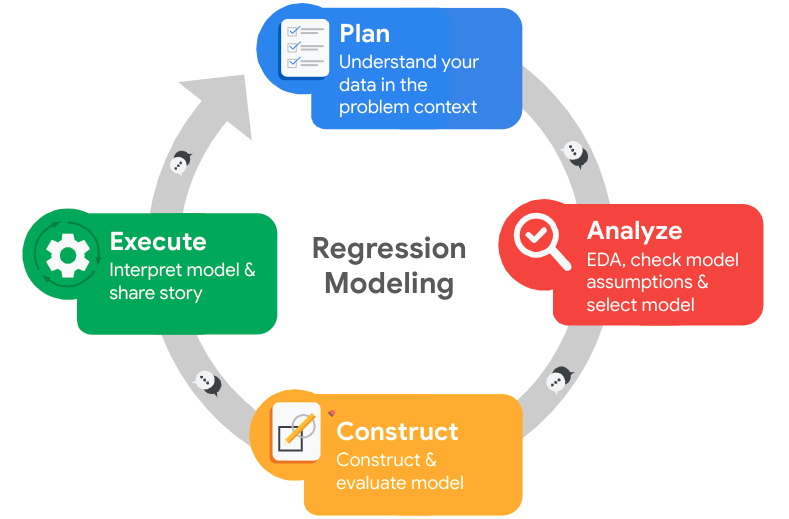

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Stakeholders for the project include Salifort Motors, its owners and business partners. Additionally, the HR department and its employees are directly affected through this project. In this project, we are trying to identify factors that lead to employee turnover in hopes of reducing these. A predictive model using regression and machine learning models will also be created to identify employees who may leave and offer intervention as soon as possible. 

The resources used include the given dataset, past projects and personal notes created through the course, online forums and LLMs for trouble shooting and the packages documentations.

As this is an HR process, it will be important to keep data confidential, and have a model that can explain the factors contributing to turnover or dissatisfaction. It is important also to remove personal identifiable information or PII to protect the identity of individuals.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
#operations
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics and functions
import pickle
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,\
roc_auc_score, roc_curve


#displaying columns 
pd.set_option('display.max_columns', None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv(r"C:\Users\Levi\Desktop\Data Analyst\Datasets\HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department':'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head(10)


satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
1516                 0.40             0.50               2   
1616                 0.37             0.46               2   
1696                 0.39             0.56               2   
1833                 0.10             0.85               6   
12000                0.38             0.53               2   

       average_monthly_hours  tenure  work_accident  left  \
396                      139       3              0     1   
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461                     142       3              0     1   
1516                     127       3              0     1   
1616                     156       3              0     1   
1696                     160       3              0     1   
1833                     266       4              0     1   
12000                    157       3              0     1   

       promotion_last_5years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
1516                       0          IT     low  
1616                       0       sales     low  
1696                       0       sales     low  
1833                       0       sales     low  
12000                      0       sales     low

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Check outliers

Check for outliers in the data.

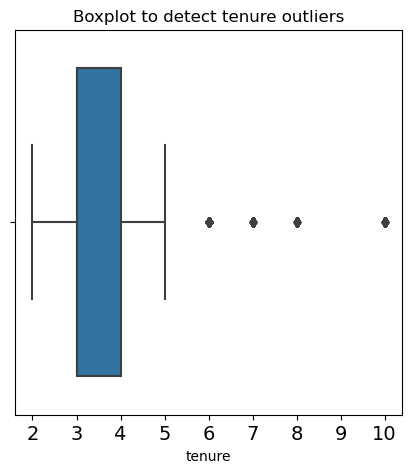

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(5,5))
sns.boxplot(x=df1['tenure'])
plt.title('Boxplot to detect tenure outliers', fontsize = 12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

#percentiles
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)

#iqr range
iqr = percentile75 - percentile25

# upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('Upper Limit: ', upper_limit)
print('Lower limit: ', lower_limit)

# identify subset containing outliers in tenure
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Upper Limit:  5.5
Lower limit:  1.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Between variables, the satisfaction and last evaluation is generally high. Number of projects average to around 4, whereas average monthly hours fall the most between 140 - 160. Average tenure is about 3 years. Most did not have work accidents nor left. A majority did not have promotions within the past 5 years. Sales has one of the highest amount of workers. For salaries, only 8% are classified as high. 


Although there were no null values, the data had many more than 3000 duplicates and 824 outliers in the tenure column. 

Transformations were done to normalize heading name to snake_format or more concise descriptions. The IQR was also used to identify outliers. These were done to ensure quality and format of data before applying further analysis. EDA allows us to better understand the data, and helps us identify transformations needed before further processing. Resources include past worksheets and projects, as well as research on how IQR works. For this stage, there are no major ethical considerations, however some minor considerations include whether or not to remove outliers for the analysis.  


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print( df1['left'].value_counts() )
print()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print( df1['left'].value_counts(normalize=True) )
print()


0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64



### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.


The first visualization is a boxplot stacked, showing the average monthly hours, in comparison to the number of projects. These will be compared for those who left (marked as 1), and stayed (marked 0).

A stacked histogram will also be plotted to represent the distribution for number of projects.

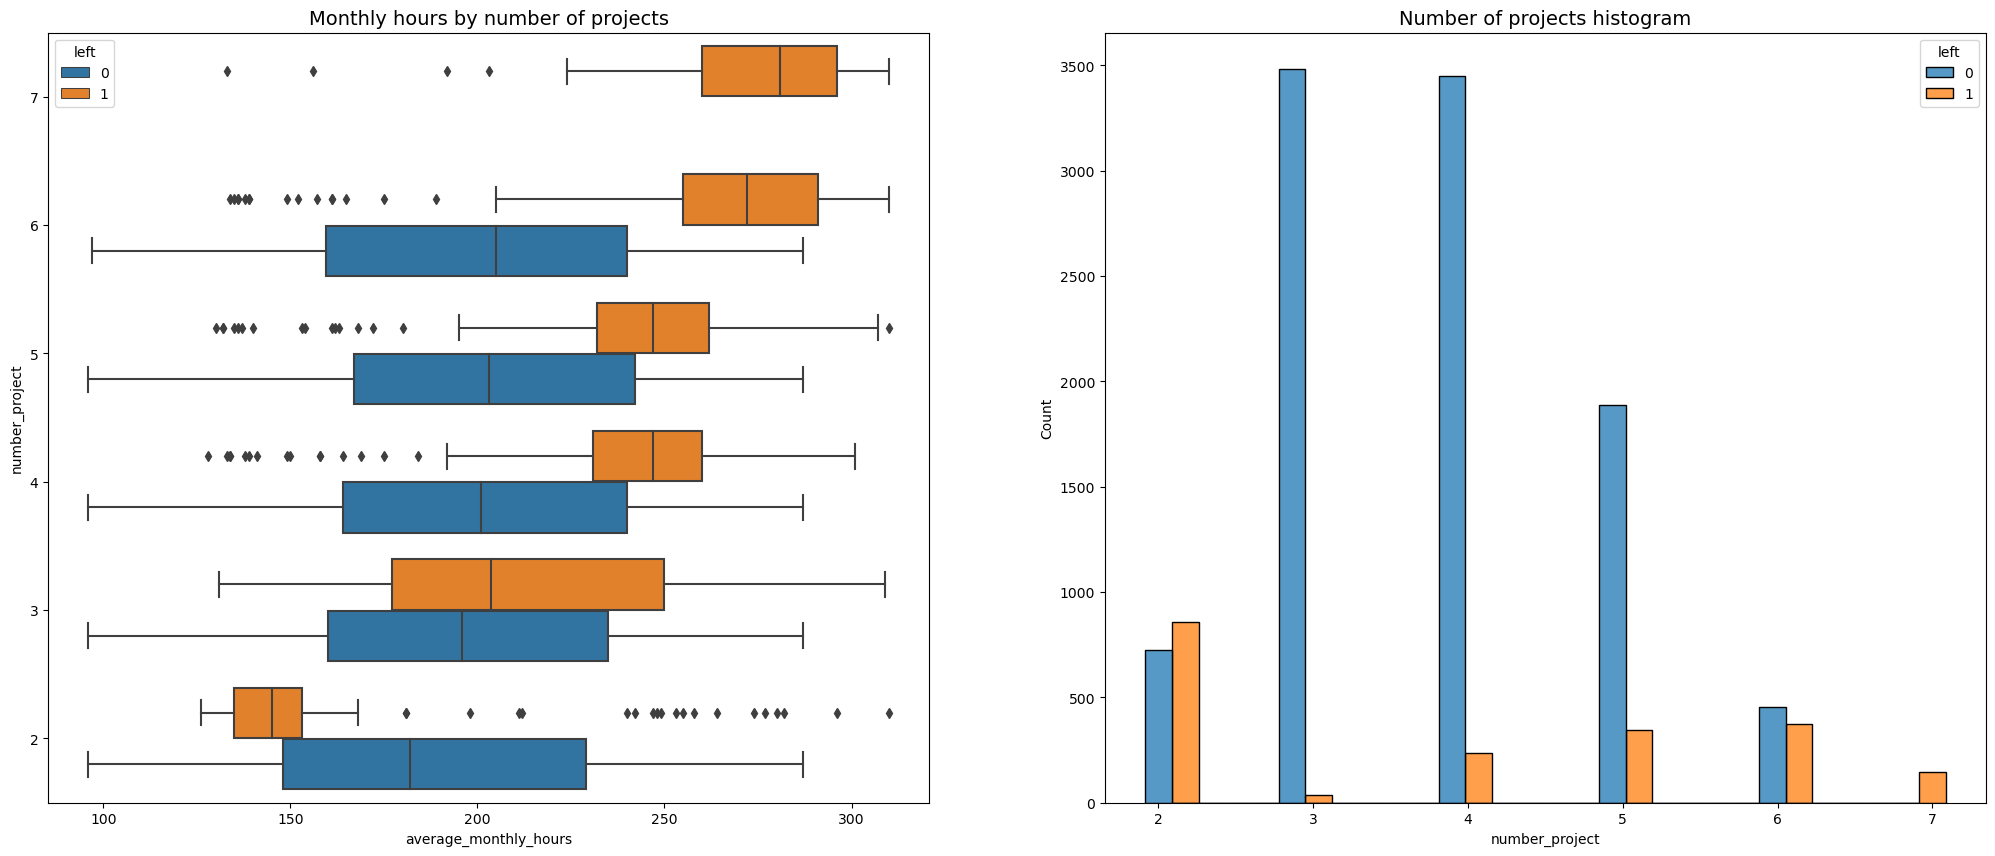

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize = (25,10))

# boxplot to show monthly hour distribution for number proj, showing stayed or left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# 2nd historgram showing distribution of project between stayed and left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()

Observations from this include the following:
- As the number of projects increases, monthly hours increase, leading to employees left. (Refer to Number of projects 4 and above). This well be referred as Group A.
- Employees with projects lower than 2, represented one of the highest groups left. (Refer to Number of projects 2). This will be referred as Group B.

We will break down possible insight for group A, group B and employees stayed.

Group A:
- Referring to the number of project 2, at both tables: It can be noticed that those left at 2 projects, worked significantly less hours than their peers. 
- 2 projects assigned are at the lower end of the spectrum it is usually 3-4 projects.
- It is possible that these groups were fired due to the lack of hours compared to peers.
- It is also possible that these groups were assigned less projects as they may have filed for LOA, vacations or leave notices.

Group B:
- These group of people have significantly more hours worked and more projects assigned to them. As the amount of projects and work hours increased, this has caused them to leave due to overwork. At employees with 7 projects assigned, everyone left.
- These groups may have contributed a large amount but were overworked.
- These group has worked about 255 - 295 hours a month. On average of 8 hours daily, 5 times a week, 4 times a month equals to 160 hours. These group has almost doubled the usual amount of hours.

Stayed Group:
- Those assigned 3 - 4 projects had the highest amount of people who stayed.
- Those working for about 150 - 225 hours represented the highest amount of people who stayed.
- Assuming that the average monthly work of 8 hours a day 5 times a week equals to 160, even for those who stayed, worked significantly more hours that this amount.
- Stayed groups seems to be overworked as well soley based on number of hours. 

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###

df1[df1['number_project']==7]['left'].value_counts()


1    145
Name: left, dtype: int64

This confirms all employees assigned 7 projects left.

Average monthly hours versus satisfaction levels is next examined:

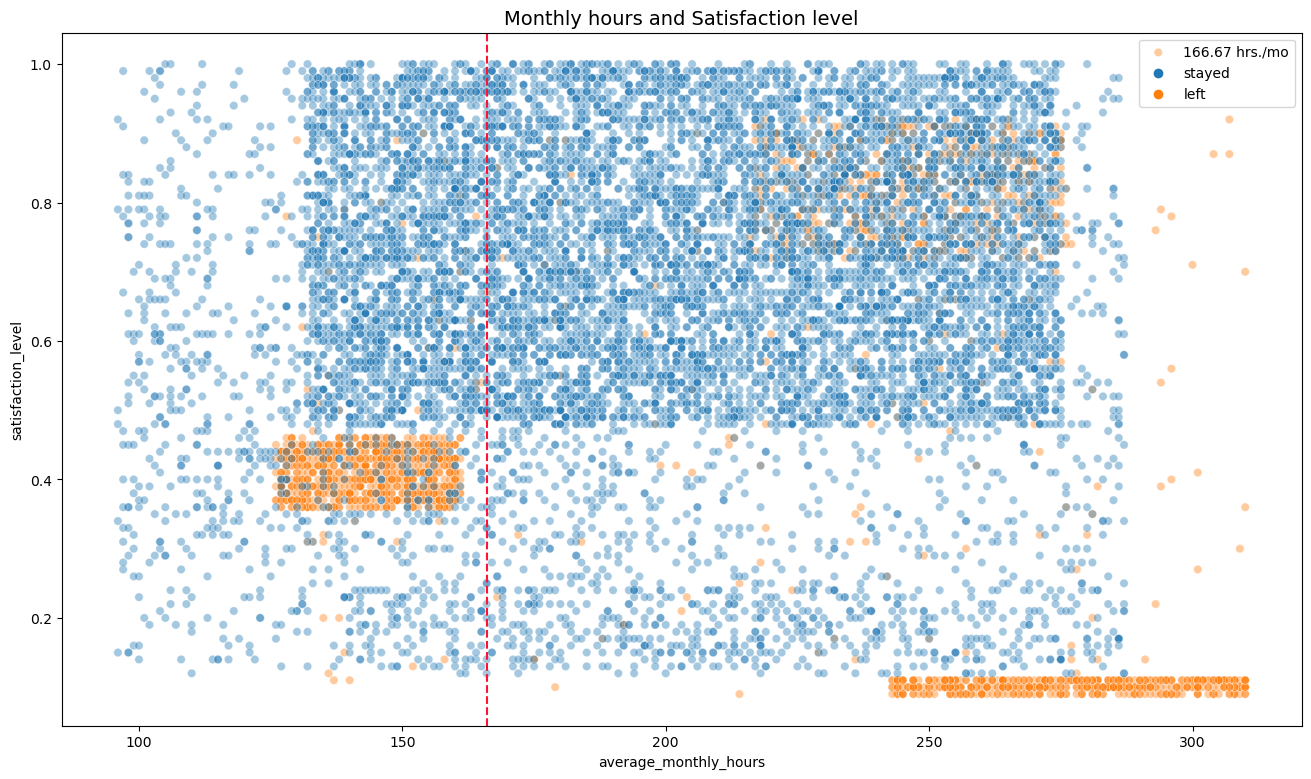

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###

#scatter plot of average monthly hours vs satisfaction levels, of stayed and left
plt.figure(figsize = (16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=.4)
plt.axvline(x=166, color='#ff1234', label='166.67 hrs/mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo', 'stayed', 'left'])
plt.title('Monthly hours and Satisfaction level', fontsize=14);

In this scatter plot, as values increase horizontally, monthly hours increase.
As values increase vertically, satisfaction increases.
The red dotted line shows us the average 166.6 hours a month of 8 hours, 5 days a week in a month.

We are shown that the first group of employees left (Group A) worked less than the the monthly required hours. On the other hand (Group B), who worked the most, had the lowest satisfaction. 

Group C:

Not seen in the previous graph, we may have a third group (Group C) in the middle, we also see groups with high satisfaction around 0.8, and high work hours around 225 - 275, ultimately leaving. Again this may be due to the high amount of work hours rendered. 

> There is also a strange shape of distributions, showing possible data manipulation or synthetic data this is due to the distributions not being symmetrical or evenly distributed on either side of the mean. (In this case, points are skewed to the right). Additionally, the distributions are not evenly spaced (data points here are clumped together in the middle of the distribution.)


Next we are visualizing satisfaction levels as affected by tenure or number of years stayed.

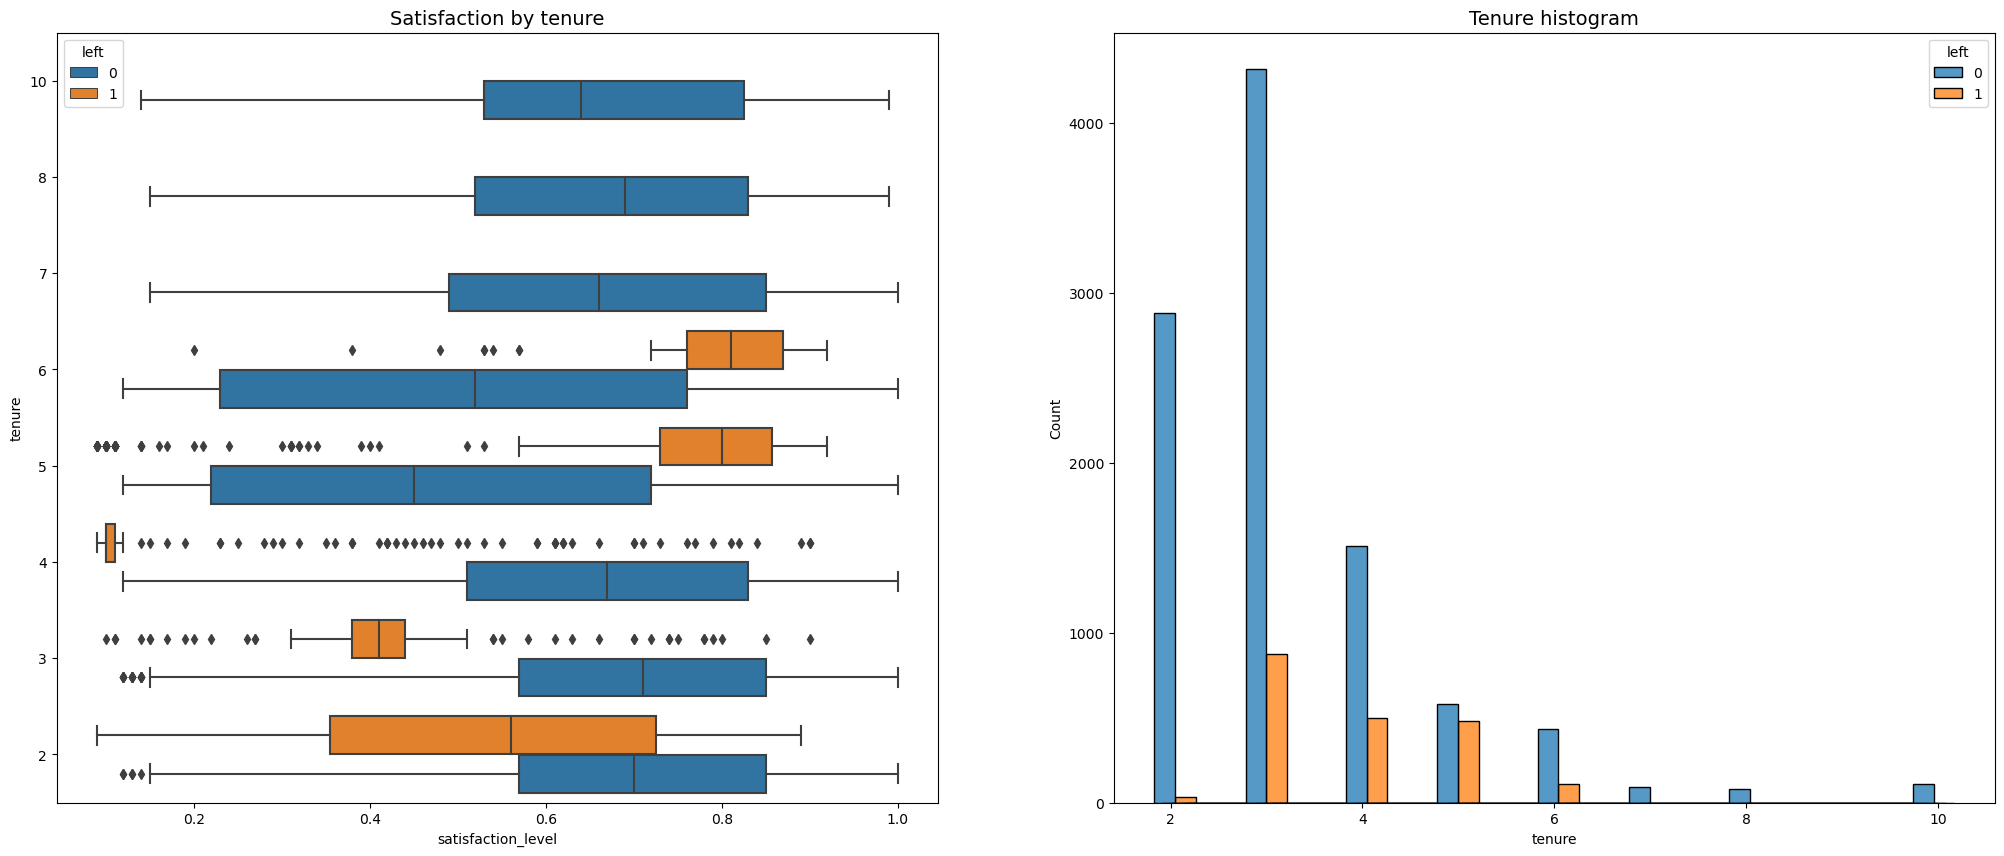

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
#set fig and axes
fig, ax = plt.subplots(1,2, figsize = (25,10))

#boxplot of satisfaction by tenure, stayed and left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize = '14')

#hist showing 'tenure' comparing stayed and left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

Observations:
- Tenure of 2 years had generally average satisfaction
- Tenure of 3 years had low satisfaction levels and had the highest amount who left.
- Tenure of 4 years has a subset of very dissatisfied employees who left.
- Tenure of 5-6 years had high satisfaction levels, but still left 

With this we can see that: 
- Employees who left fell into two categories: 
- Group D. Dissatisfied with lower tenures and 
- Group E. Very satisfied with medium to higher tenures.
- Group F. 4 Year tenure, with very low satisfaction.

We will continue the alphabetical grouping for now then we can further compile or summarize similarities between the groupings later on .

Insights:
- For Group F. or employees with 4 years, it is worth investigating further that led to very low dissatisfaction levels. Did this group face major changes in policies or salaries? Investigation of reasons for leaving in this area will give valuable insights.
- Satisfaction levels of year 7-10 and new employees are similar. Looking into which reasons led them to stay will be valuable.
- For Group E or the 2nd group of highly satisfied employees who left in tenures 5-6, further investigation should be done. Why did the employees leave despite a high amount of satisfaction? It is possible that although they enjoyed their work, an event has caused a majority of them to leave.

A closer look will be applied for Group E as it is questionable why they left despite the high satisfaction rate.

In [18]:
# Filter rows based on columns: 'satisfaction_level', 'time_spend_company' and 'left'
group_e = df1[(df1['satisfaction_level'] >= 0.7) & (df1['tenure'] >= 5) & df1['left'] == 1]
print(group_e['salary'].value_counts(normalize=True))
print(group_e['salary'].value_counts())
print(group_e['department'].value_counts(normalize=True))
print(group_e['promotion_last_5years'].value_counts())

low       0.580645
medium    0.397177
high      0.022177
Name: salary, dtype: float64
low       288
medium    197
high       11
Name: salary, dtype: int64
sales          0.280242
technical      0.197581
support        0.175403
IT             0.070565
product_mng    0.062500
marketing      0.058468
accounting     0.050403
RandD          0.046371
hr             0.038306
management     0.020161
Name: department, dtype: float64
0    495
1      1
Name: promotion_last_5years, dtype: int64


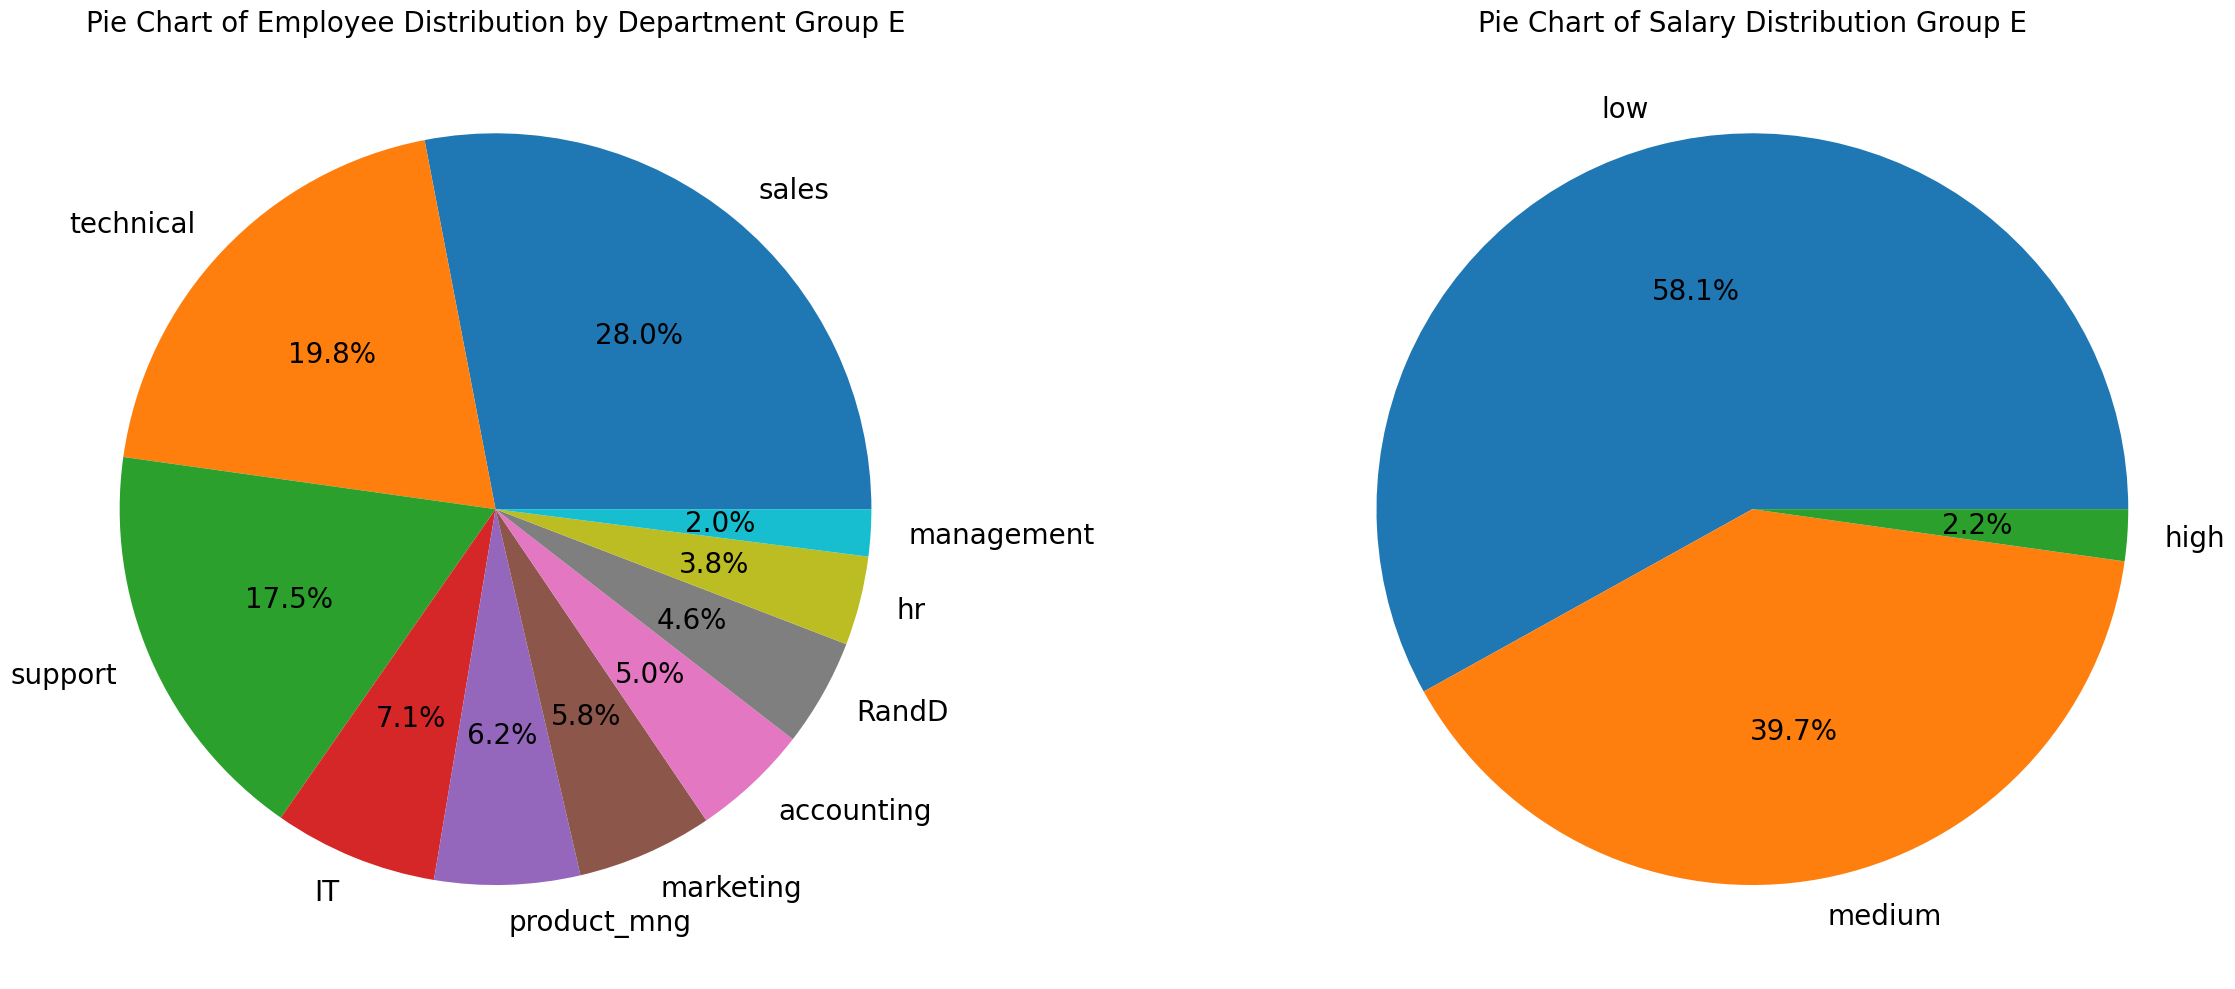

In [19]:
# create object for value counts
e_dept_counts = group_e['department'].value_counts()
e_salary = group_e['salary'].value_counts()


# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

# Create a pie chart of the department counts
ax[0].pie(e_dept_counts, labels=e_dept_counts.index, autopct="%1.1f%%", textprops={'fontsize': 20})
ax[0].set_title("Pie Chart of Employee Distribution by Department Group E", fontsize = '20')

# Create a pie chart of the salary distribution
ax[1].pie(e_salary, labels=e_salary.index, autopct="%1.1f%%", textprops={'fontsize': 20})
ax[1].set_title("Pie Chart of Salary Distribution Group E", fontsize = '20')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the figure
plt.show()

In this group, we filtered the data based on Group employees who left despite the ff criteria:
- Satisfaction level of more than 7
- Tenure of more than 5

We found that despite being in the company for more than 6 years, only 2% of the employees have high salary. 58% are low and the rest are in medium.

In terms of departments, 28% are in sales, 19% in IT and 17% in support. 

Likewise, only 1 person got promoted. 

It is possible that leaves in Group E, despite the high satisfaction are caused by, lack of promotion and lack of increase in salary. Departments sales, technical and support are most affected.


As the next step, we can look at the mean and median satisfaction of employees who left and who didn't.

In [20]:
# Calculate mean and median satisfaction scores of left and stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

Undeniably, satisfaction is much lower in those who left.   

Interestingly enough, for those who stayed, the mean is lower than median this gives the possibility that:
- Distribution is negatively skewed
- There are more extreme scores (dissatisfied) in the bottom than at the top (satisfied)
- There is a long tail of employees dissatisfied, bringing down the mean
- The majority are only moderately satisfied, but there is a small number very dissatisfied pulling down the mean.
- The company may also have a polarized environment - meaning there are very satisfied and very dissatisfied workforce: If out of 100 employees, 90 are satisfied, but 10 are very dissatisfied, the mean satisfaction will be lower than median satisfaction.

For those who left, mean is higher than the median. This means that:
- The most dissatisfied employees are more likely to leave, the company looses its unhappiest employees, improving overall satisfaction in remaining, this may be a flag of high turn over rates.
- There may be root issues not addressed leaving to more leaves.


We will then examine salary levels for different tenures.






Text(0.5, 1.0, 'Salary Histogram by Tenure (Long)')

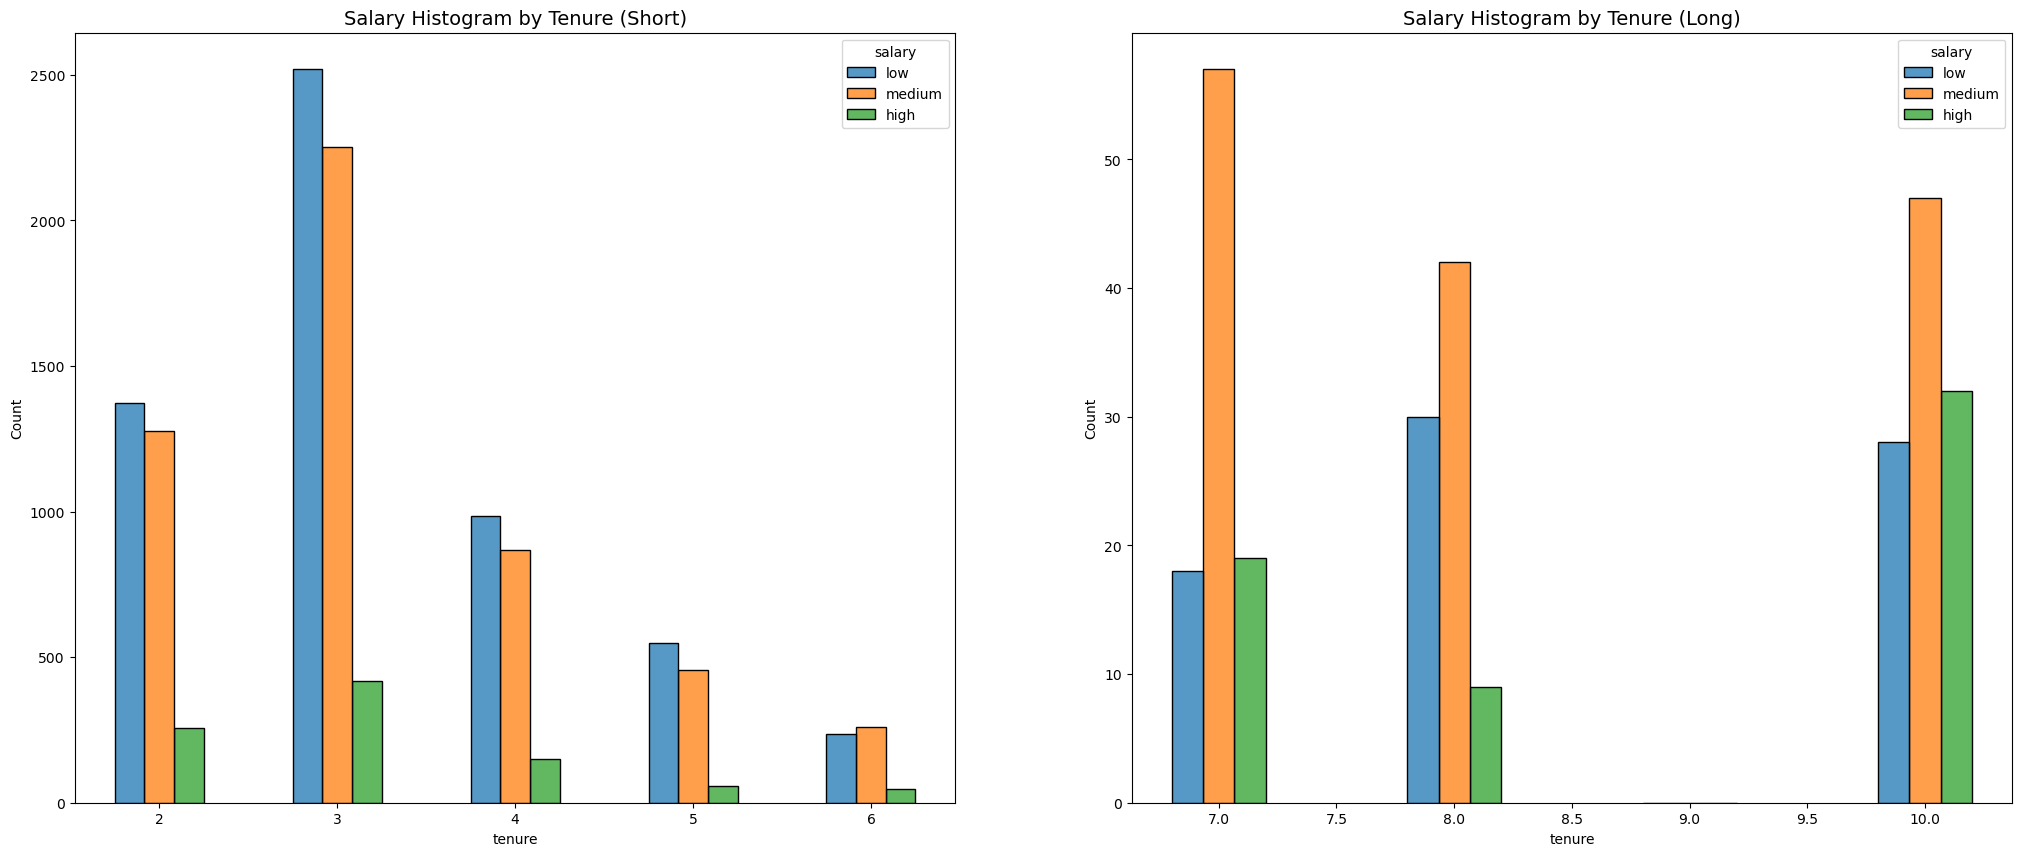

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###

# set fig and axes
fig, ax = plt.subplots(1, 2, figsize = (25, 10))

# define long and short tenure
tenure_short = df1[df1['tenure'] < 7]
tenure_long = df1[df1['tenure'] > 6]

#plot short tenure
sns.histplot(data=tenure_short, x='tenure',hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary Histogram by Tenure (Short)', fontsize='14')

#plot long tenure
sns.histplot(data=tenure_long, x='tenure',hue='salary', discrete=1,
             hue_order=['low', 'medium','high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary Histogram by Tenure (Long)', fontsize='14')


As the amount of years increase, the salary does not increase proportionally. Longer years did not necessarily convert to higher salary. For those that are paid high salaries, they have stayed in the company for more than 10 years. This may refer to C-level managers.  

Next we can explore correlation of working hours and higher evaluation scores. A scatter plot is a good chart for displaying relationships.

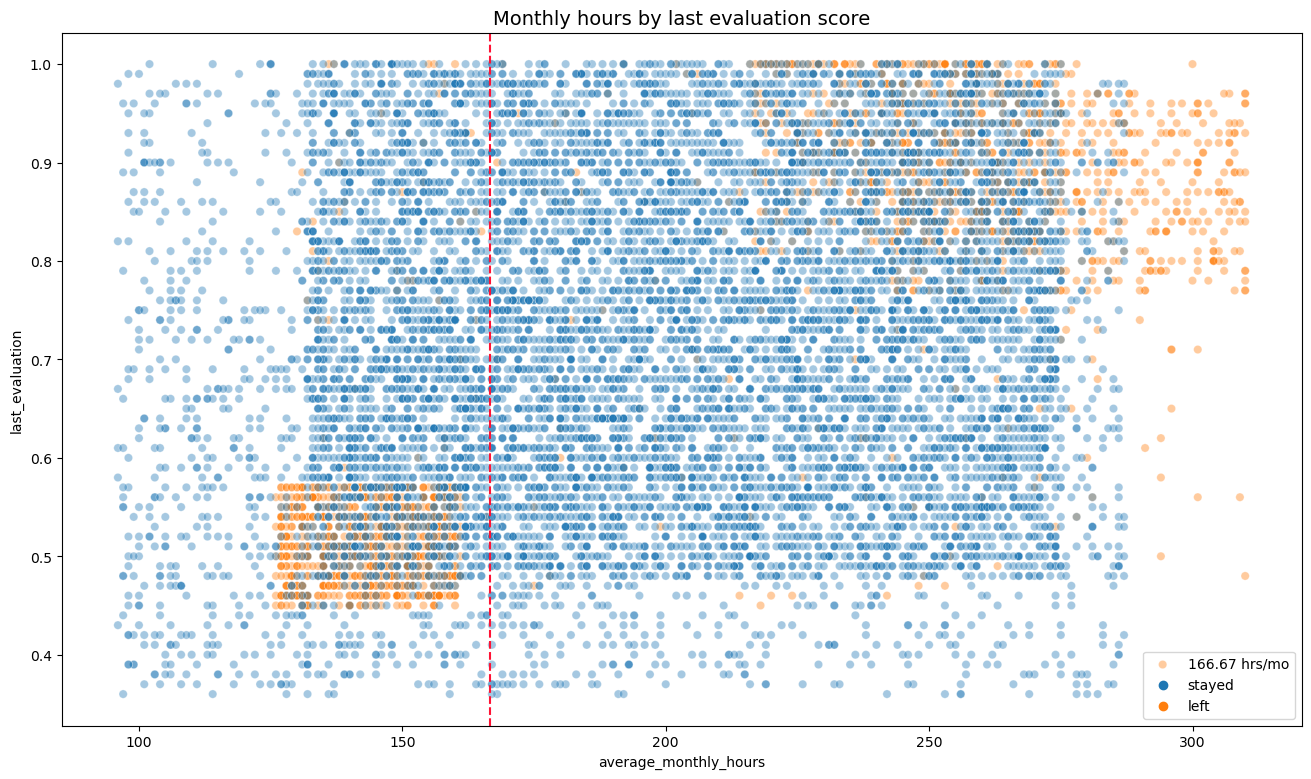

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

# scatterplot of avg monthly hours and last evaluation
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation',
                hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff1234', label='166.67 hrs/mo', ls='--')
plt.legend(labels=['166.67 hrs/mo', 'stayed','left'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

From the scatter plot we can observe the ff:
- The two groups who left are highlighted in orange, in the lower left and upper right portion of the plot.
- Two groups can be found again, those who put monthly hours and received high evaluation, and those who put less time below the average monthly hours and received low evaluation.
- Working long hours does not guarantee high evaluation score since evaluation is still distributed randomly across increasing hours
- Large majority of employees work more than 167 hours a month. 


We will then look into promotions cross the last 5 years in relation to their hours.


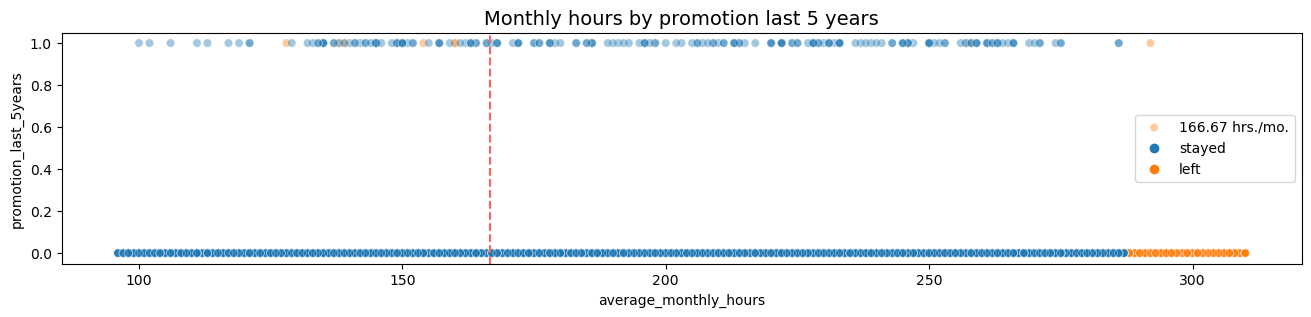

In [18]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');


The plot informs us the following:
- The proportion of promoted in the last 5 years were small in relation to the amount of employees.
- Most of those who left were from those not promoted, despite working the longest hours.

Next we will inspect the distribution of employees leaving within various departments.


In [24]:
print(df1["department"].value_counts())
print(df1["department"].value_counts(normalize=True))

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64
sales          0.270119
technical      0.187140
support        0.151864
IT             0.081394
RandD          0.057877
product_mng    0.057210
marketing      0.056125
accounting     0.051789
hr             0.050121
management     0.036361
Name: department, dtype: float64


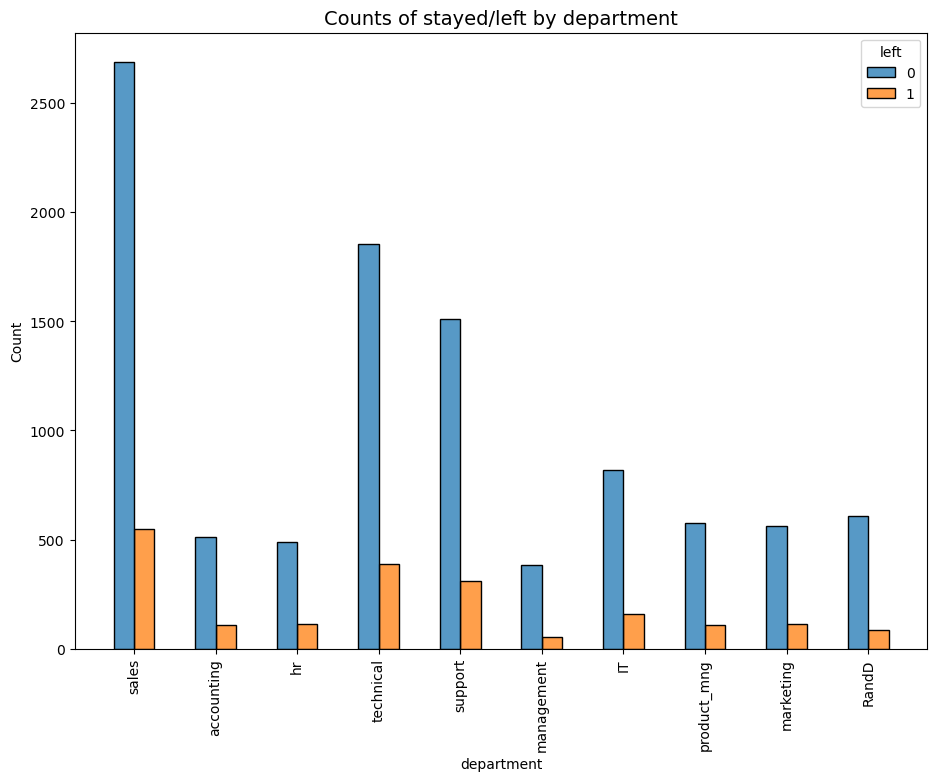

In [25]:
# stacked histogram of depts for stayed and left
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1,
             hue_order=[0,1], multiple='dodge', shrink=.5)
plt.xticks(rotation='vertical')
plt.title('Counts of stayed/left by department', fontsize=14);


No department in particular has a proportionally significant amount of employees who stayed or left. However, sales, technical and support has the highest amount who left. This is balanced by the fact that there are more employees as well.


Lastly variable correlations are checked within the data.

C:\Users\Levi\AppData\Local\Temp\ipykernel_14832\2633037711.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))


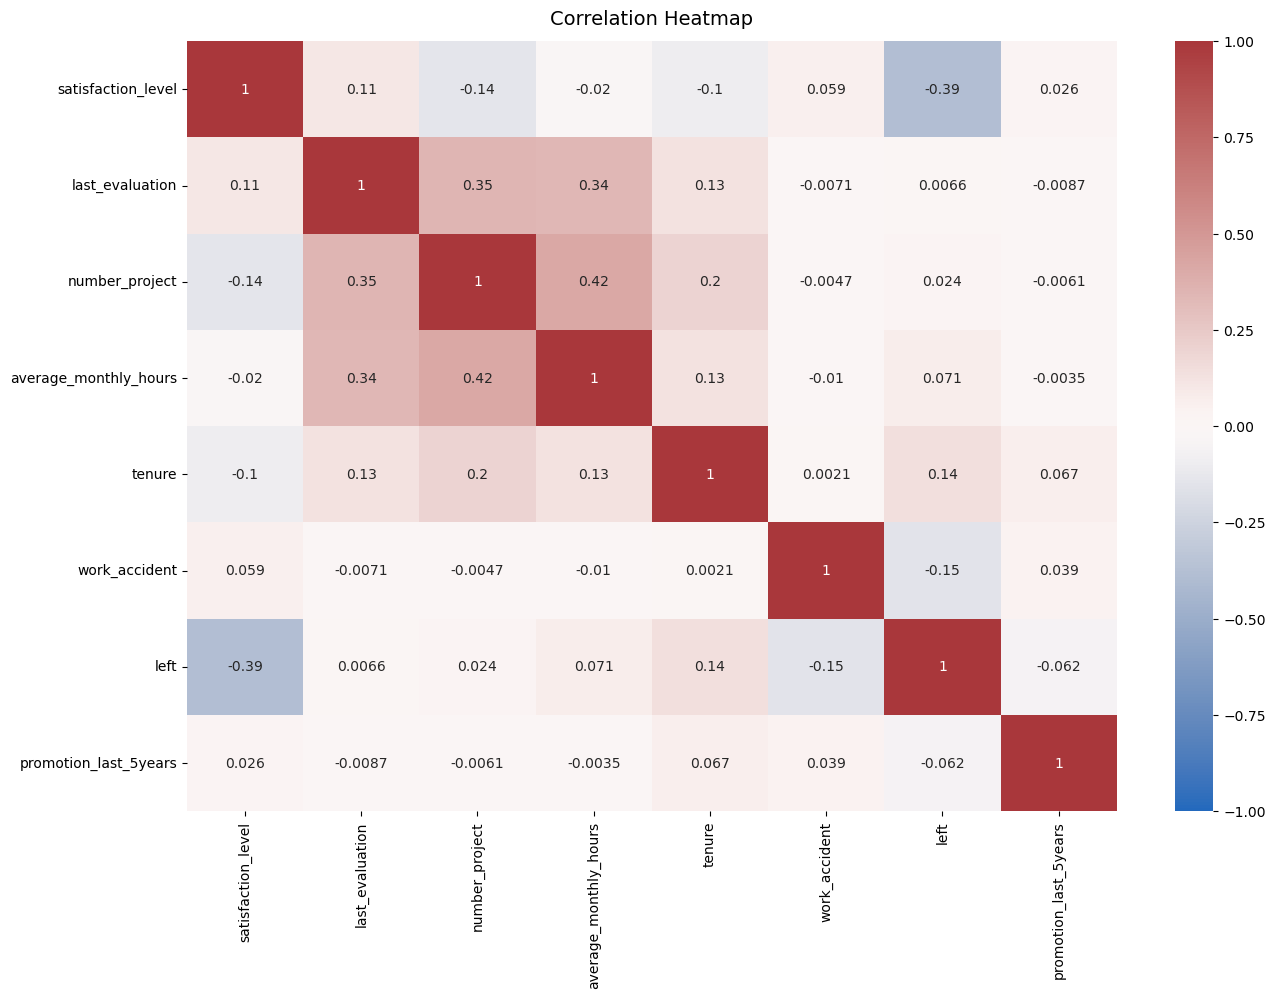

In [26]:
# create a correlation heatmap
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The highest positive correlation includes:
- Number of projects and average monthly hours
- Last evaluation and number of projects
- Last evaluation and average monthly hours

The highest negative correlation includes:
- satisfaction level and employees left

### EDA Insight Summary

Various observations can be said through our eda, we found that leaving is related with:
- longer working hours
- increasing amount of projects
- lower satisfaction levels
- lack of promotion
- lack of increase in salary throughout years.

Working long hours, but not receiving promotions, higher salary, or better evaluation scores may have caused dissatisfaction and burn out. Despite this, people who have stayed for more than 6 years tend to stay.




To decrease confusion of groupings and better understand insights, we will compile the observations of groups who left into "Churned" groups.  

##### Churned 1 includes:
- Group A: Significantly worked less hours with only 2 projects assigned
- Group D: dissatisfied and with lower tenure, 3 years and below
- This subgroup have lower tenures, worked less hours and had less projects assigned.

##### Churned 2 includes:
- Group B: Significantly more hours worked and more projects assigned
- Everyone with 7 projects assigned left
- This subgroup may have been exposed to overwork or experienced burnout.

##### Churned 3 includes:
- Group C: High satisfaction, but very significant amount of work hours 225 - 275.
- Group E: High satisfaction, with higher tenure (more than 5 years) but still left
- This subgroup may have left due to lack in promotion and salary increase.

##### Churned 4 includes:
- Group F: 4 Year tenure with very low satisfaction
- This subgroup may have experienced impactful changes.
- Further investigation of changes in policies required.

#### Stayed:
- For the groups who stayed, there was an average of 3-4 projects assigned.
- High monthly hours of 150-255 hours, from the average 166.7
- Satisfaction level ranges were relatively high for tenures 2-4, lowered for tenures 5-6, then returned to the initial ranges for 7 and above years.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The objective of this prediction is to create a prediction model for employees leaving the company. This is a categorical prediction and can range from values 0 (stayed) and 1(left company). 

### Identify the types of models most appropriate for this task.

Since we are working with a categorical model the following approaches can be considered:
- Logistic Regression (Binomial)
- Tree-based Machine Model (Decision Tree and Random Forest)

Although this activity only requires you to select an approach, we will be doing both approaches and comparing each model with each other. (Also for learning experience.)


### Modeling A: Logistic Regression
The following is a concise outline of steps to be taken throughout the Logistic Regression.
1. Encode non-numeric variables (via pd.get_dummies function)
2. Correlation Heatmap
3. Employees Left / Stayed across Depts.
4. Remove outliers
5. Feature Selection
6. Test, train split
7. Fitting the model
8. Confusion Matrix
9. Checking class balance
10. Evaluation of Metrics

1. Encoding of non-numeric variables: department and salary categories.
The salary category is ordinal (hierarchy), so to keep the differentiation, we will turn them to numbers 0-2 instead. 

In [27]:
### YOUR CODE HERE ###

#copy the dataframe
df_enc=df1.copy()


#encode the salary column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low','medium','high'])
    .cat.codes
)

# dummy encode depts
df_enc = pd.get_dummies(df_enc, drop_first=True)
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  \
0       3              0     1                      0       0   
1       6              0     1                      0       1   
2       4              0     1                      0       1   
3       5              0     1                      0       0   
4       3              0     1                      0       0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

Heat map to measure correlation of variables and identify variables we want to measure.

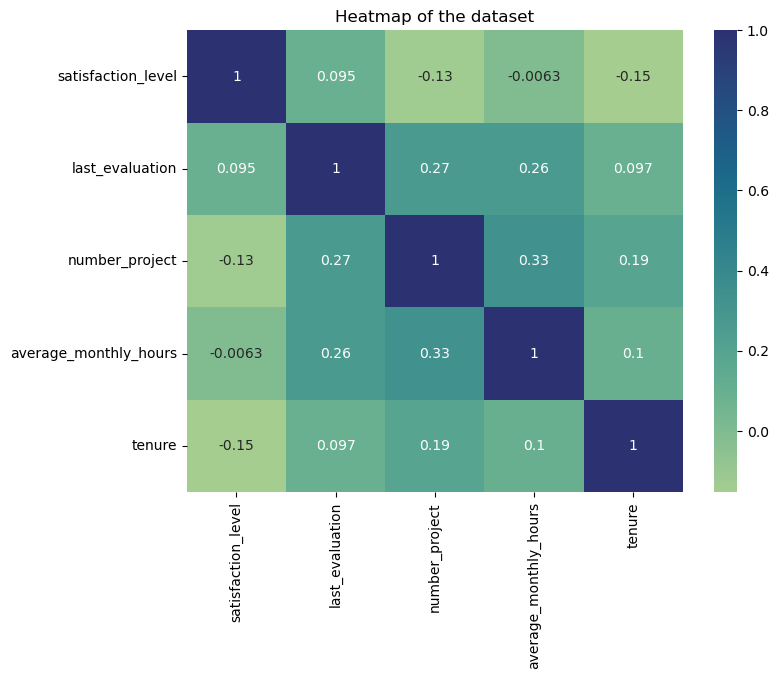

In [28]:
# correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project','average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap='crest')
plt.title('Heatmap of the dataset')
plt.show()

To visualize number of employees across all departments who stayed and left, we can use a stacked bar plot.

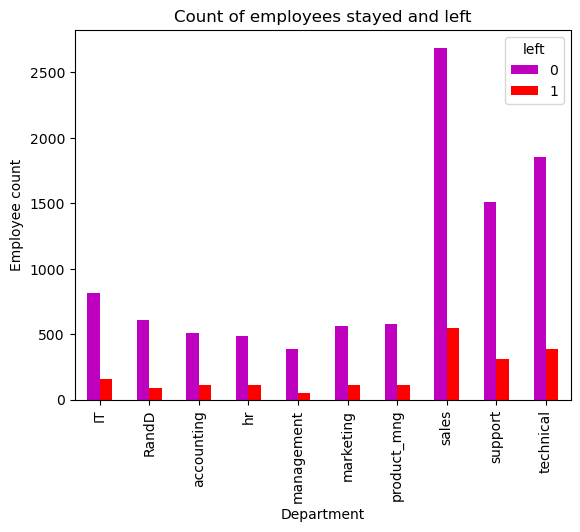

In [29]:
# stacked bar plot for numbers of employees dept (left and stayed)
pd.crosstab(df1['department'],df1['left']).plot(kind='bar', color ='mr')
plt.title('Count of employees stayed and left')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Due to the nature of logistic regression being sensitive to outliers, we can remove tenure outlier now. 

In [30]:
# select rows without outliers in tenure into new data frame
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  \
0       3              0     1                      0       0   
2       4              0     1                      0       1   
3       5              0     1                      0       0   
4       3              0     1                      0       0   
5       3              0     1                      0       0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

In [31]:
# isolate dependent variable
y = df_logreg['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [32]:
# select independent variables
X = df_logreg.drop('left', axis = 1)
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_RandD  \
0       3              0                      0       0                 0   
2       4              0                      0       1                 0   
3       5              0                      0       0                 0   
4       3              0                      0       0                 0   
5       3              0                      0       0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   
5                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   
5                     0                       0                 1   

   department_support  department_technical  
0                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0  
5                   0                     0

In [33]:
# split into train and test sets, stratifying y to keep classes balanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

After selecting variables and splitting into test and training sets. We can now instantiate and fit the model.

In [34]:
# instantiate logistic regression model and fit training dataset
log_clf = LogisticRegression(random_state= 42, max_iter=500).fit(X_train, y_train)

We can use the X_test to test  the logistic regression model's performance.

In [35]:
y_pred = log_clf.predict(X_test)

To visualize this, let's create a confusion matrix

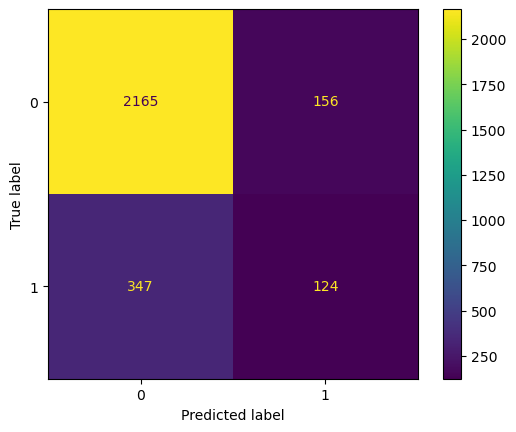

In [36]:
# get values for cm
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

#plot confusion matrix
log_disp.plot(values_format='')
plt.show()


The top left corner shows the True Positives predicted, with the lower right corner showing the predicted True Negatives. On the other hand, the top right corner shows the False Positives, while the lower left corner shows the False Negatives. 

1. Top Left: True Positives - Predicted leaving and actually left.
2. Lower Right: True Negatives - Predicted staying and actually stayed.
3. Top Right: False Positives - Predicted leaving but stayed
4. Lower Left: False Negatives - Predicted staying but left.

- In our dataset, the model was able to correctly predict the majority of employees leaving (2165). 
- The next largest quadrant is the False Negatives, meaning the model predicted leavers, but actually stayed. 
- Since our model had lots of predictions of employees leaving, who actually stayed, this means that our model has a little bit of overfitting, as it is sensitive to factors that would make employees leave, this is good as it is important for us to be sensitive to employee that has potential to leave.

- The True Positives and False Negatives had an equal number of predictions and are the lowest values.


Check the class balance of left in class data.

In [37]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

With 83% and 17% split, the balance is not perfect but not too imbalanced also, this may have cause the slight overfit. With this imbalance,accuracy is not a good metric, despite this, we can use precision, recall, f1 and support.

In [38]:
# classification report
target_names = ['Predicted stayed', 'Predicted left']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

Predicted stayed       0.86      0.93      0.90      2321
  Predicted left       0.44      0.26      0.33       471

        accuracy                           0.82      2792
       macro avg       0.65      0.60      0.61      2792
    weighted avg       0.79      0.82      0.80      2792



The logistic regression achieved a precision of 79%, recall of 82%, and f1 of 80%. Despite good weighted avg performance, it was most important to predict employees leaving, which had significantly lower scores.

### Modeling B: Tree-based Model
The following is a concise outline of steps to be taken throughout the Decision Tree modeling.
1. Isolate Dependent Variables
2. Select Features
3. Test Training Split

Isolate the outcome variable, and select features for the predictor variables

In [39]:
#Isolate the outcome variables
y = df_enc['left']

# Display the first few rows of 'y'
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [40]:
# Select features 
X = df_enc.drop('left', axis = 1)

# Display the first few rows of x
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_RandD  \
0       3              0                      0       0                 0   
1       6              0                      0       1                 0   
2       4              0                      0       1                 0   
3       5              0                      0       0                 0   
4       3              0                      0       0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  
0                   0                     0  
1                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0

In [41]:
# split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision Tree 1 
1. Instantiate, Params, Scoring and GridSearch
2. Fit Model
3. Best Params and AUC
4. Extract Scores

In [42]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# assign dictionary of hyperparamters for gridsearch
cv_params = {'max_depth': [4,6,8, None],
             'min_samples_leaf': [2,5,1], 
             'min_samples_split': [2,4,6]}

#assign a dictionary of scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearchCV
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [43]:
%%time
# Fit decision tree model to training data
tree1.fit(X_train, y_train)


CPU times: total: 3.02 s
Wall time: 3.03 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

Identify the best parameters and auc score from our GridSearch

In [44]:
#identify best parameters for our decision tree
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [45]:
# identify best AUC  score for our decision tree
tree1.best_score_

0.969819392792457

The AUC score is very high, showing us that this model is very capable on predicting employees leaving. 

From here, we can write a function to extract all scores from our Grid Search.

In [46]:
#function to extract scores from grid search
def make_results(model_name:str, model_object, metric:str):
    '''
    model_name: name of model in output table
    model_object: fit GridSearchCV object
    metric: precision, recall, f1, roc_auc, accuracy
    
    returns df with results with best mean scores across validation folds
    '''
    #create dictionary that maps input metric to actual metric
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'auc': 'mean_test_roc_auc',
                 'accuracy': 'mean_test_accuracy'}
    
    # get all results from CV and put in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    #isolate row of df with max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(),:]
    
    #extract metrics from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # create a table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision':[precision],
                          'recall': [recall],
                          'F1':[f1],
                          'accuracy': [accuracy],
                          'auc':[auc],
                          })
    return table

We use this function to get scores from grid search.

In [47]:
# get all CV scores
tree1_cv_results = make_results('Decision Tree CV', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819

All scores are past 90% and are very strong indicators of a good model. 
In addition to the decision tree, we will use a random forest to reduce overfitting. Likewise, we will set up cross-validated grid search for the best parameters.

#### Random Forest 1
1. Instantiate, Params, Scoring and GridSearch
2. Fit Decision tree model to training data
3. Save model via Picke
4. Best Params, AUC and Evaluate Scores
5. Get all scores

In [48]:
# instantiate model
rf = RandomForestClassifier(random_state=0)

# assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf':[1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300,500],}

#assign a dictionary of scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

#instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [49]:
%%time
# fitting random forest to training data
#rf1.fit(X_train, y_train) # around 20 min wall time

CPU times: total: 0 ns
Wall time: 0 ns


We save this model via pickle to reduce waiting time for future notebook runs. In addition, we use '#' for the fit command so it does not run in the next open.

In [50]:
# define foler path
path = r'C:\Users\Levi\Desktop\Data Analyst\Google Advanced Analytics\7. Capstone Project\\'

In [51]:
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        


In [52]:
def read_pickle(path, saved_model_name:str):
    with open(path+saved_model_name+'.pickle','rb') as to_read:
        model = pickle.load(to_read)
    return model

Use the function defined above to save model and read it in

In [53]:
# write pickle
#write_pickle(path, rf1, 'hr_rf1')
# making sure to '#' this so it does not run again


In [54]:
# read pickle
rf1 = read_pickle(path, 'hr_rf1')

From here, we identify best AUC scores and params of the Random Forest model on the training set.

In [55]:
rf1.best_score_

0.9803963087745455

In [56]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [57]:
# collect evaluation scores in a df model
rf1_cv_results = make_results('Random Forest CV', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  Random Forest CV   0.948704  0.915614  0.931836  0.977761  0.980396


Comparing both models, the random forest performed better in that the decision tree, specifically in precision, f1 and auc. For recall and accuracy, there were only marginal differences. Overall, the random forest model outperforms the decision tree model. 

After these, we can use the test set to evaluate the final mode. 

Lets start by defining a function that gets all scores from model's predictions

In [58]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

We use the best performing model (random forest) evaluate its performance on the test set.

In [59]:
# get predictions on test set and evaluate
rf1_test_scores = get_scores('Random Forest 1 CV', rf1, X_test, y_test)
print(rf1_test_scores)
print(rf1_cv_results) # comparing with validation scores.


                model  precision    recall        f1  accuracy       AUC
0  Random Forest 1 CV   0.964211  0.919679  0.941418  0.980987  0.956439
              model  precision    recall        F1  accuracy       auc
0  Random Forest CV   0.948704  0.915614  0.931836  0.977761  0.980396


Even compared to the validation scores, our test set performed similarly well. Also, since our test set is unseen data, we can be confident that the model will perform well on other unseen data also.


### Feature Engineering

The evaluation scores seem too high and maybe caused by data leakage. Training on a model with leaked data can give unrealistic scores in production.
Data leakage occurs when we mistakenly use data, which may:
- Already exist in test data
- Realistically, we may not have access to this data when deploying model

On an actual environment, we have to consider in 2 situations.
A. We may not have access to immediate satisfaction levels for all employees.
B. The average_monthly_hours maybe too highly or directly correlated. Employees leaving or fired may have already given a heads up and thus were assigned few hours.

In this 2nd round of modeling, we will include feature engineer to simulate a more realistic environment when the model is deployed. 
1. "satisfaction_level" will be dropped
2. A column 'overworked' will be created as a categorical / binary variable.
3. Isolate variables
4. Create test train split

In [60]:
# drop satisfaction level, and save data frame to new variable
df2 = df_enc.drop('satisfaction_level', axis=1)
df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_RandD  \
0              0     1                      0       0                 0   
1              0     1                      0       1                 0   
2              0     1                      0       1                 0   
3              0     1                      0       0                 0   
4              0     1                      0       0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  
0                   0                     0  
1                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0

In [61]:
# create new col overworked and inspect its min and max values
df2['overworked'] = df2['average_monthly_hours'] 

print('Max hours: ', df2['average_monthly_hours'].max())
print('Min hours: ', df2['average_monthly_hours'].min())

Max hours:  310
Min hours:  96


With 166.67 being the average monthly work hours (8 hours a day, 5x per week), we will define overworked as having monthly hours more than 175hrs.

We will reassign average_monthly_hours using a boolean mask (converting to T or F) and .astype(int) to convert to 1 = True, 0 = False

In [62]:
# define overworked with monthly hours above 175
df2['overworked'] = (df2['overworked'] > 175).astype(int)
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [63]:
# drop average monthly hours
df2 = df2.drop('average_monthly_hours', axis=1)
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_RandD  department_accounting  \
0                      0       0                 0                      0   
1                      0       1                 0                      0   
2                      0       1                 0                      0   
3                      0       0                 0                      0   
4                      0       0                 0                      0   

   department_hr  department_management  department_marketing  \
0              0                      0                     0   
1              0                      0                     0   
2              0                      0                     0   
3              0                      0                     0   
4              0                      0                     0   

   department_product_mng  department_sales  department_support  \
0                       0                 1                   0   
1                       0                 1                   0   
2                       0                 1                   0   
3                       0                 1                   0   
4                       0                 1                   0   

   department_technical  overworked  
0                     0           0  
1                     0           1  
2                     0           1  
3                     0           1  
4                     0           0

Isolate features and target variables again.

In [64]:
# isolate target variable
y = df2['left']

# drop features
X = df2.drop('left', axis=1)

Split into test and training sets.

In [83]:
#create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision Tree 2
Based on these new features, we will create a decision tree again.

1. Instantiate, Params, Scoring and Grid Search
2. Fit model to values
3. Best Params, Best scores

In [95]:
#instantiate model
tree = DecisionTreeClassifier(random_state=0)

# assign dictionary of hyperparameters
cv_params = {'max_depth':[4,6,8, None],
             'min_samples_leaf':[2,5,1],
             'min_samples_split':[2,4,6]}

# assign scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

#instantiate grid search
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [96]:
%%time
tree2.fit(X_train,y_train)

CPU times: total: 2.5 s
Wall time: 2.5 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [97]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [98]:
tree2.best_score_

0.9594361127439034

Surprisingly, even without the satisfaction levels and work hours in detail, the model has good performance.

Let's compare it with previous model results.

In [88]:
tree2_cv_results = make_results('Decision Tree 2 CV', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
                model  precision    recall        F1  accuracy       auc
0  Decision Tree 2 CV   0.856693  0.903553  0.878882  0.958523  0.959436


Precision, recall, F1 fell by a larger margin as compared to accuracy and auc. This is to be expected since we removed one of the most indicative predictors. Despite this, the model performs well.

#### Random Forest 2
Based on these new features, we will create a Random Forest again.

1. Instantiate, Params, Scoring and Grid Search
2. Fit model to values
3. Pickle
4. Best Params, Best scores, make results
5. Confusion Matrix

In [89]:
#instantiate model
rf = RandomForestClassifier(random_state=0)

# assign dict of hyperparameters
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# assign scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

#instantiate grid search
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit = 'roc_auc')

In [90]:
%%time
# fit model, and '#' after
# rf2.fit(X_train, y_train) # 13 mins

CPU times: total: 13min 24s
Wall time: 13min 28s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [91]:
#write pickle
write_pickle(path, rf2, 'hr_rf2') 

In [92]:
# read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [93]:
#chest best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [94]:
# check best auc score on cv
rf2.best_score_

0.9649187452509641

In [99]:
# get all cv scores
rf2_cv_results = make_results('Random Forest 2 CV', rf2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)
print(rf1_cv_results)
print(rf2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
                model  precision    recall        F1  accuracy       auc
0  Decision Tree 2 CV   0.856693  0.903553  0.878882  0.958523  0.959436
              model  precision    recall        F1  accuracy       auc
0  Random Forest CV   0.948704  0.915614  0.931836  0.977761  0.980396
                model  precision    recall        F1  accuracy       auc
0  Random Forest 2 CV   0.866431  0.880763  0.873246  0.957634  0.964919


Scores fell again from the first to second random forest. This is to be expected. Despite this the model works well. In terms of the decision tree 2 and random forest 2, if auc is used as the deciding metric random forest 2 performed better.

In this case, AUC is useful in situations where there is class imbalance (we have more who stayed than left), and overall model performance in terms of ranking different models. 

Random Forest 2 is our champion model. We can evaluate this with our test set.

In [100]:
rf2_test_scores = get_scores('Random Forest 2 CV', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall       f1  accuracy       AUC
0  Random Forest 2 CV   0.871154  0.909639  0.88998  0.962642  0.941419

With our champion model performing well, we can use a confusion matrix to evaluate its performance on the test set. 

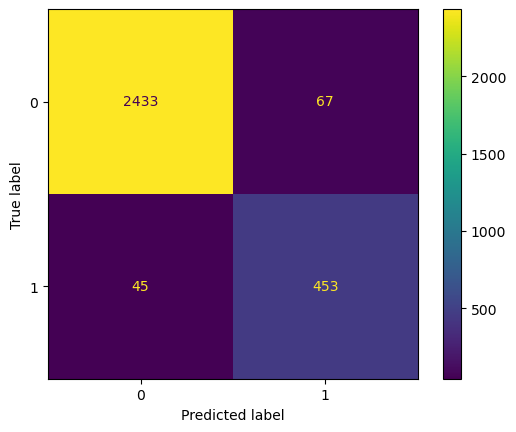

In [101]:
# generate array of values for confusion matrix 
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

#plot cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)
disp.plot(values_format='');

Recall that:
1. Top Left: True Positives - Predicted leaving and actually left.
2. Lower Right: True Negatives - Predicted staying and actually stayed.
3. Top Right: False Positives - Predicted leaving but stayed
4. Lower Left: False Negatives - Predicted staying but left.

- In our dataset, the model was able to correctly predict the majority of employees leaving (2433). 
- The next largest quadrant is the True Negatives, meaning the model predicted stays successfully. 
- Since our model predicted more false positives than false negatives, the model is likely to predict leavers, when they will actually stay.
- Despite this, this is a strong model. Comparing it to our Linear regression model created earlier, this has significantly less incorrect prediction.

We would also want to see the decision tree splits and feature importances of the model.

#### Decision Tree Splits
Note, you can expand image on the upper right of the picture, or double click to see the tree.

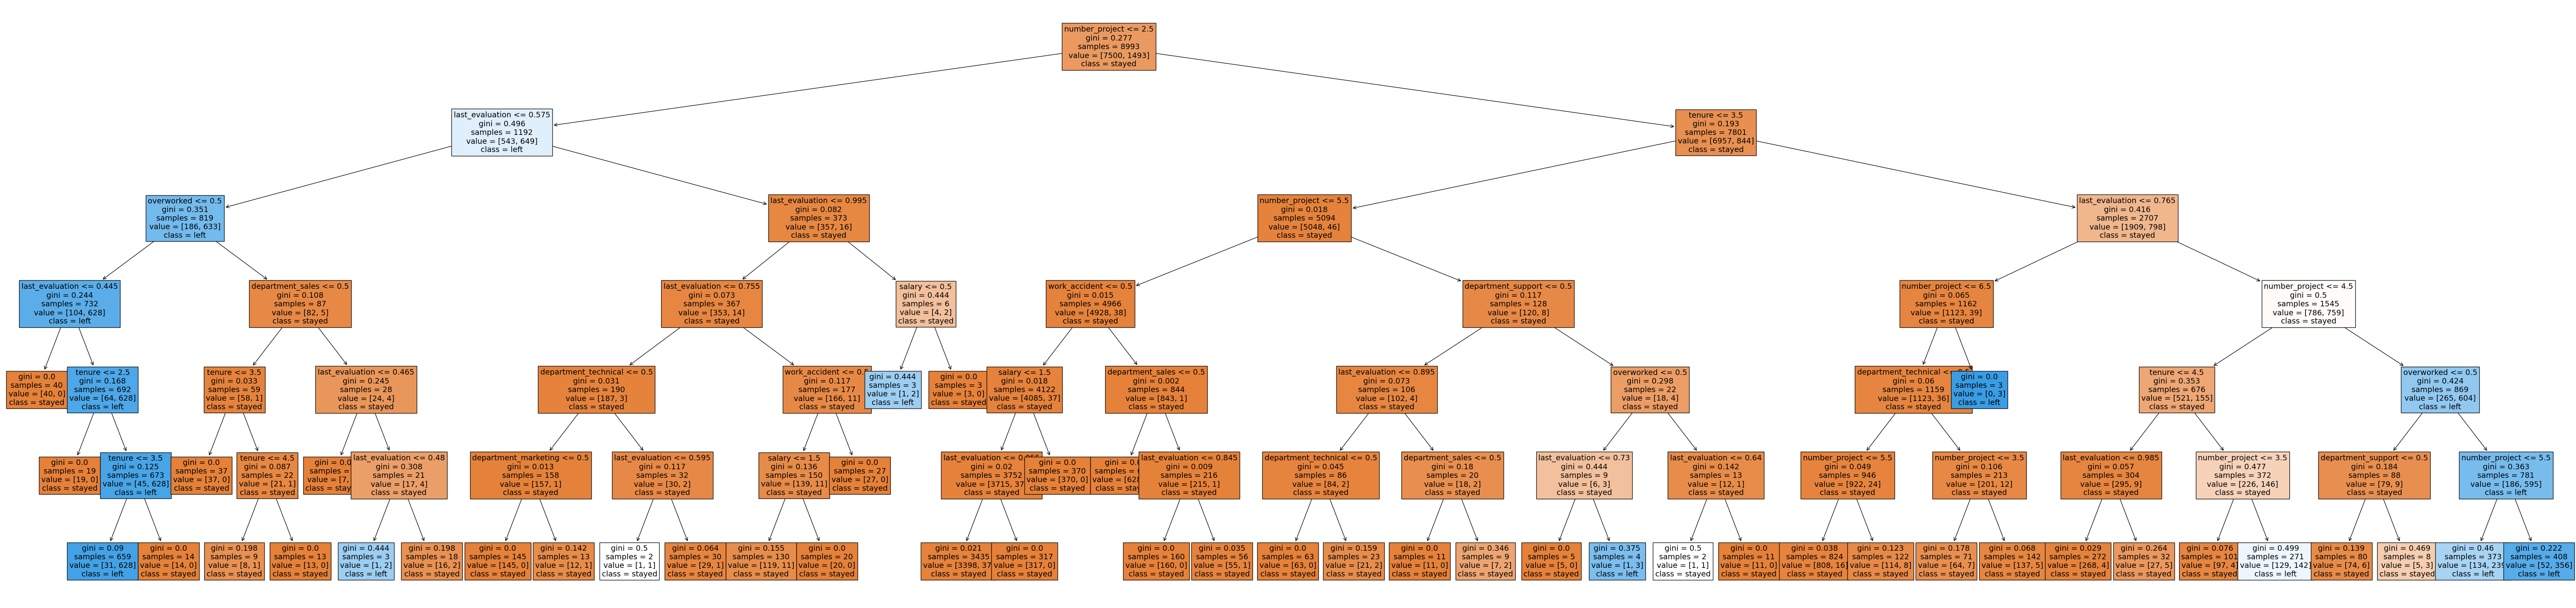

In [114]:
# Plot the tree, make sure to use [list] for feature_names and class_names
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=list(X.columns), 
          class_names=['stayed','left'], filled=True);
plt.show()

#### Decision Tree feature importance

In [117]:
#plot the tree importance
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns)
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

#only extract if importances is greater than 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.344043
number_project               0.343470
tenure                       0.215627
overworked                   0.093521
department_support           0.001142
salary                       0.000911
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_marketing         0.000078

A barplot will be created to help visualize this.

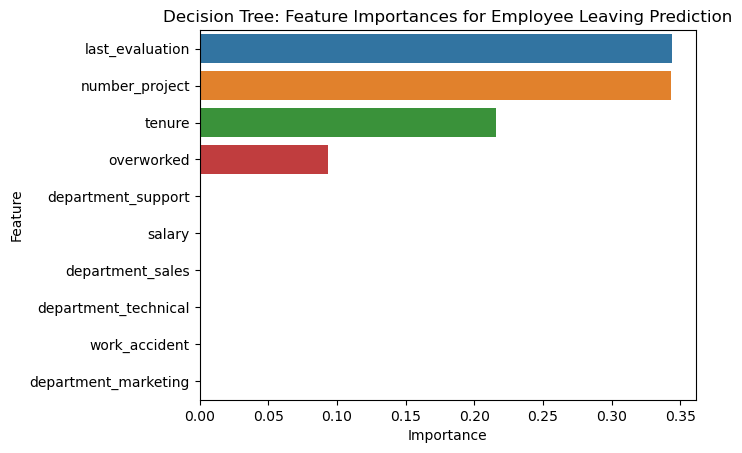

In [121]:
#creation of barplot for the importance above
sns.barplot(x=tree2_importances['gini_importance'], y=tree2_importances.index, orient = 'h')
plt.title('Decision Tree: Feature Importances for Employee Leaving Prediction', fontsize = 12)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()


#### Random Forest feature importance

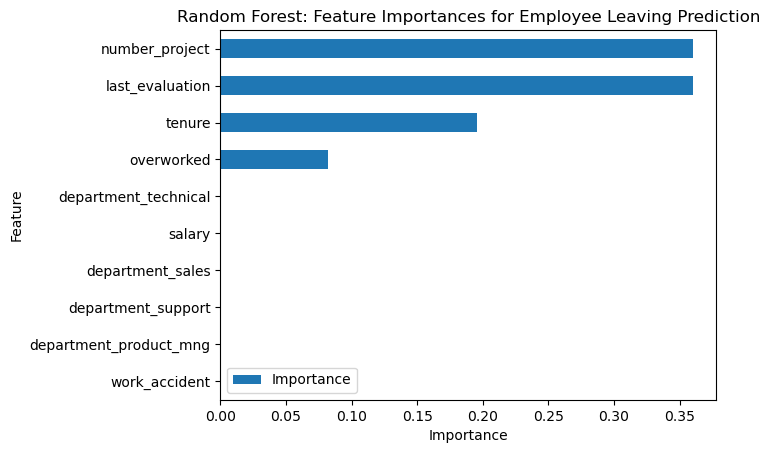

In [123]:
# get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

#get col labels of top 10 features
feat = X.columns[ind]

# filter feat impt of top 10 features
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({'Feature': feat, 'Importance': feat_impt})
y_sort_df = y_df.sort_values(by='Importance')
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh', ax=ax1, x='Feature', y='Importance')

#add labales
ax1.set_title('Random Forest: Feature Importances for Employee Leaving Prediction', fontsize = 12)
ax1.set_xlabel('Importance')
ax1.set_ylabel('Feature')
plt.show()


From here, we can see that he most important predictors for both models on leavers include:
1. Number of Projects assigned 
2. Last Evaluation (Ranked first in Decision Tree)
3. Tenure
4. Overworked

Although further investigation needs to be done to interpret these better, it is surprising to see that the last evaluation (score of the employee's last performance review) is one of the top predictors. This means that employees are severely impacted by their performance review, or that low performance reviews eventually lead to leaving whether by resignation, firing, lower pay or other factors (again, this must be further investigated).

Unsurprisingly, number of projects assigned and overwork are also both top predictors, this supports our findings on the relationship between overwork and leaving. 

Finally tenure is also one of the most important predictors. Aside from the findings in the EDA, it is important to conduct interviews or further investigation on the subset of individuals on certain tenures that left the company (such as the amount of leavers on tenure 4). 

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Summary of model results

#### Logistic Regression
The logistic regression model was able to give decent performances with the following metrics:

- Precision 80%
- Recall 83%
- F1 Score 80%
- Accuracy 83%

Insights: 
- The model was able to correctly predict the majority of employees leaving (2165). 
- The next largest quadrant is the False Negatives, meaning the model predicted leavers, but actually stayed. 
- Since our model had lots of predictions of employees leaving, who actually stayed, this means that our model has a little bit of overfitting, as it is sensitive to factors that would make employees leave, this is good as it is important for us to be sensitive to employee that has potential to leave.


#### Tree Based Machine Learning

Since models has questionably good performance, this may have been a case of data leakage (unrealistic amount of data and high correlation.) Feature engineering was applied to give a more realistic approach and a second set of models was created.

The champion model is the Random Forest with scores of the ff in our test set.
- Precision 87%
- Recall 91%
- F1 Score 89%
- Accuracy 96%
- AUC 94%

Insights:
The most important predictors for both models on leavers include:
1. Number of Projects assigned 
2. Last Evaluation (Ranked first in Decision Tree)
3. Tenure
4. Overworked

Employees are severely impacted by their performance reviews which may have lead to resignation, firing, lower pay or other factors (further investigation needed).

Number of projects assigned and overwork are also both top predictors of leaving

Tenure must also be looked into possibly via interviews or further investigation on the subset of individuals that left the company (such as the amount of leavers on tenure 4). 



#### Insights Based on Model
##### Findings from EDA
Leaving is related to:
- longer working hours
- increasing amount of projects
- lower satisfaction levels
- lack of promotion
- lack of increase in salary throughout years

The leavers fall into the ff groups:
1. Worked less hours and only 2 projects assigned, lower tenures 3 and below
2. Worked more hours and more projects assigned, (7+ assigned all left)
3. High satisfaction, but high amount of work hours, lack of promotion or salary increase
4. Tenure of 4 years, may have experienced impactful changes.

Here are the attributes of those who stayed:
1. Average of 3-4 projects assigned
2. Monthly hours rendered 150-255
3. High satisfaction for tenure 2-4, lower for 5-6 and reaches initial ranges 7 on above.

##### Findings from Modeling
From the importance features the ff were identified as top leaving predictors:
1. Number of Projects assigned 
2. Last Evaluation
3. Tenure
4. Overworked


### Recommendations and Next Steps for Salifort Motors
##### Workload
- Equally distribute workload between workers, (between 3-4 projects only).
- Reduce monthly hours rendered, through automation, improved systems or workflow as overwork is highly correlated to leaves.
- Conducting interviews on most time consuming areas of the work will be a huge step.
- Make sure new employees understand hourly expectations before hiring.
- Reward employees working overtime via pay, benefits or bonus.

##### Evaluation
- Identify effect of low evaluation to employed and quitting, is pay reduced? Does this eventually lead to firing? 
- Avoid reserving high evaluation for 200+ hrs rendered, consider a bonus or incentive system instead.
- Utilize the model to predict potential leavers, and create an intervention and reward program for employees.

##### Identify Causes
- Identify via interviews or investigation, what causes lower satisfaction on tenures 5-6, and what caused leaving from year 4.
- Consider promoting or increasing salary for individuals on their 4th year (ensure promotion within 5 years).
- Conduct internal surveys, FGDs and team meetings to check on employees workload, health, mental and well-being.


#### Improving the Model
- Reduce columns of data that will not be realistically always available (such as last evaluation if not conducted often).
- Creating unsupervised learning models to identify common traits between employees and leaving.
- Specific information instead of categorical (such as salaries) and see if it improves performance.
- Test different models or utilize models with better explainability (such the single decision tree) to better identify reasons for leaving.


#### Other Questions that can be addressed
- Departments with highest leaves include sales, technical and support, however, this is in proportion as these groups are the largest also.
- For further insights or analyses, feel free to contact me.

#### Resources Used
- Previous work materials
- Google Advanced Data Analytics Certificate course materials

#### Ethical Considerations
- Deployment of the model will cause identification of certain individuals who may be likely to resign. With this, the company has great responsibility to maintain fairness when treating its leaving and non-leaving employees. Likewise, the model still has false positive/negative predictions and ultimately, early intervention is required from the company rather than relying on the model. 

### Conclusion

Thank you for your time reading this output on Salifort Motors. Although the output was lengthy and insights are summarized at the end, more detailed information and analyses are provided throughout the notebook, specifically in the Exploratory Data Analysis (EDA) and model building. If you want similar analysis for your company or have job opportunities for a Data Analyst/Scientist feel free to email me at lotillaryan@gmail.com. Thank you again for your time and have a great day ahead!